In [24]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

In [25]:
model = yolov8_heatmap(
    weight="weights/best.pt",
    method="GradCAM",
    show_box=False
)

Model summary: 225 layers, 3012798 parameters, 0 gradients


In [26]:
SAMPLE_IMG="C:\\Users\\haksh\\Documents\\CALSS MATERIALS\\SEM7\\Capstone\\datasets\\VisDrone\\VisDrone2019-DET-train\\images\\0000263_00001_d_0000173.jpg"

In [27]:
imagelist = model(
    img_path=SAMPLE_IMG
    )

In [28]:
len(imagelist)

1

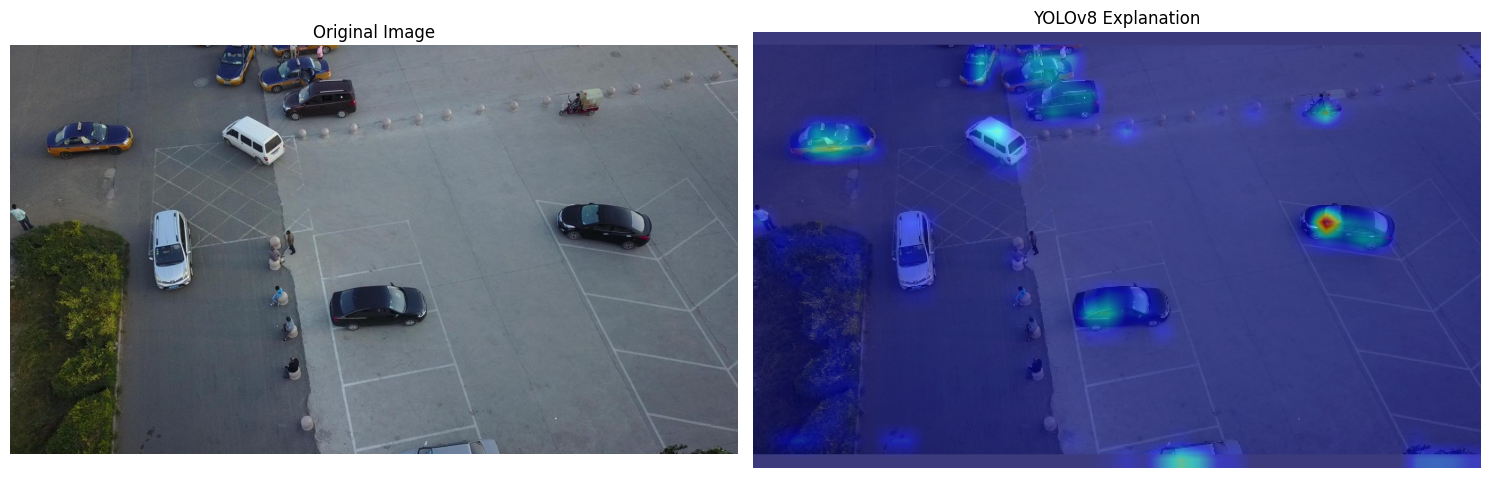

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

# Load original image
original_img = Image.open(SAMPLE_IMG)

# Create subplot to show original and explanation side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Show original image
axes[0].imshow(original_img)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show explanation image
axes[1].imshow(imagelist[0])
axes[1].set_title("YOLOv8 Explanation")
axes[1].axis('off')

plt.tight_layout()
plt.show()

Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients


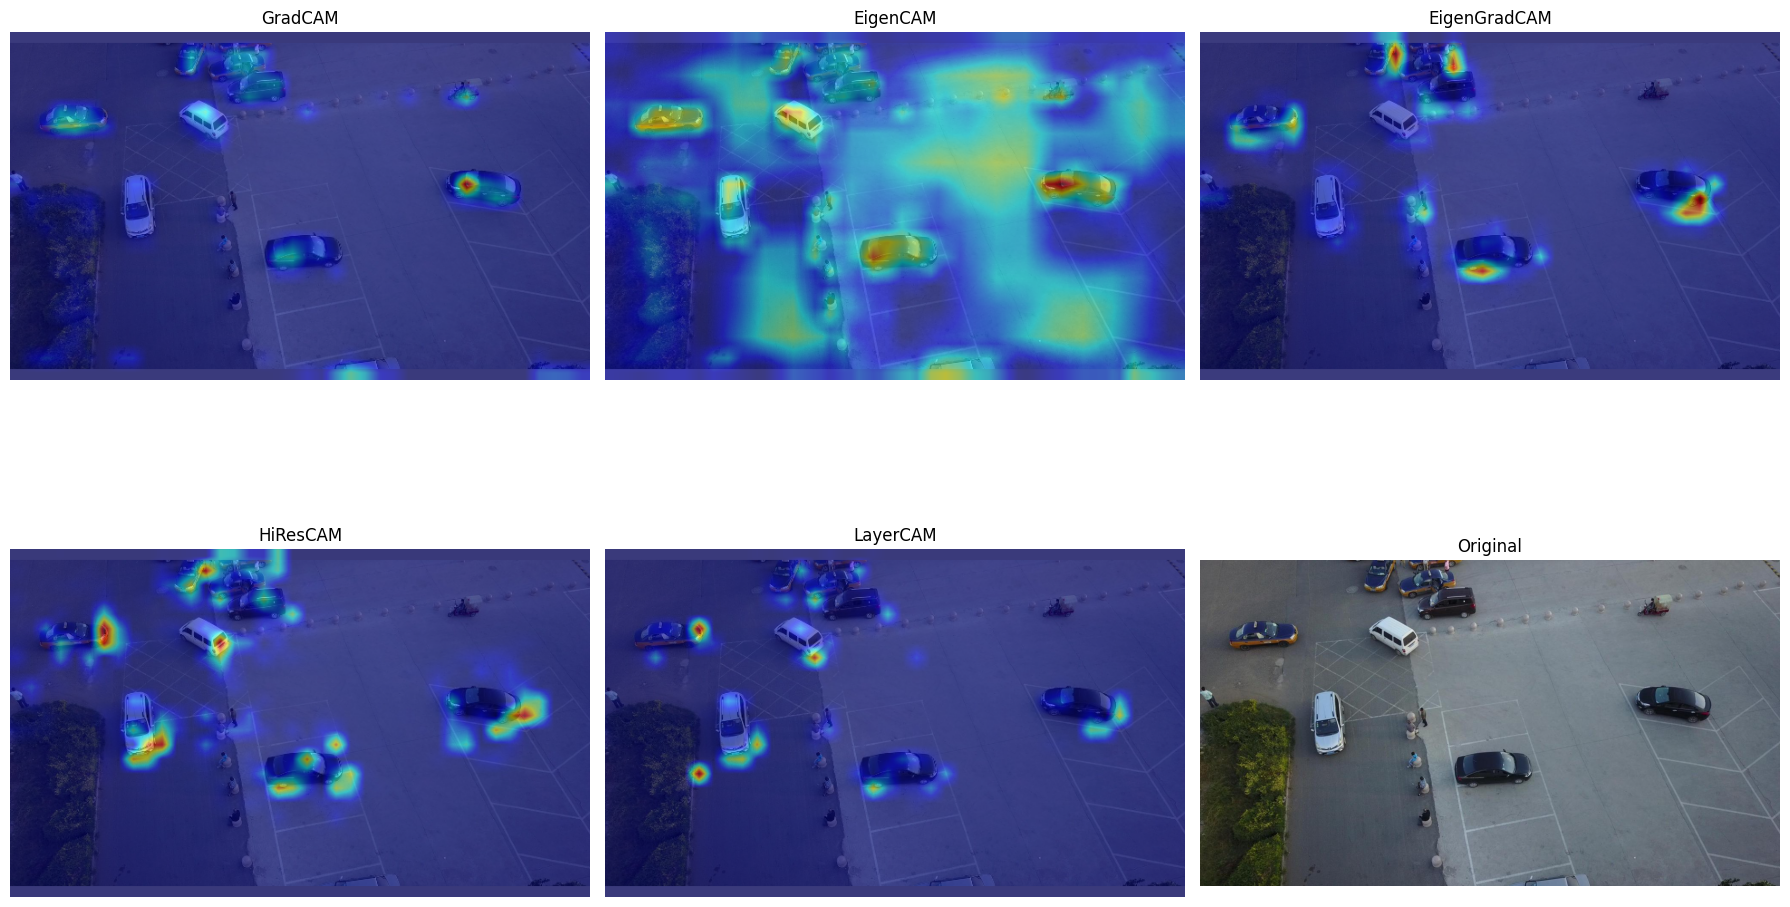

In [30]:
methods = ["GradCAM", "EigenCAM", "EigenGradCAM", "HiResCAM", "LayerCAM"]
results = {}

for method in methods:
    model = yolov8_heatmap(weight="weights/best.pt", method=method, show_box=False)
    results[method] = model(img_path=SAMPLE_IMG)[0]

# Create comparison grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, (method, img) in enumerate(results.items()):
    row, col = i // 3, i % 3
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"{method}")
    axes[row, col].axis('off')
axes[1, 2].imshow(original_img)
axes[1, 2].set_title("Original")
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

In [31]:
PRUNED_FINETUNED = "weights/best.pt"
ORIGINAL = "../Object-Detection/Yolo-V8/weights/best.pt"

## Model Metrics Comparison

Compare the performance metrics of the original model vs pruned & fine-tuned model

In [32]:
from ultralytics import YOLO
import pandas as pd
import torch
import os

# Fix for PyTorch 2.6+ weights_only security update
# Temporarily override torch.load to use weights_only=False for YOLO models
original_torch_load = torch.load

def patched_torch_load(*args, **kwargs):
    if 'weights_only' not in kwargs:
        kwargs['weights_only'] = False
    return original_torch_load(*args, **kwargs)

torch.load = patched_torch_load

# Load both models
print("Loading models...")
print(f"Pruned model path: {PRUNED_FINETUNED}")
print(f"Original model path: {ORIGINAL}")
print(f"Pruned exists: {os.path.exists(PRUNED_FINETUNED)}")
print(f"Original exists: {os.path.exists(ORIGINAL)}")

try:
    model_pruned = YOLO(PRUNED_FINETUNED)
    print("✓ Pruned model loaded")
except Exception as e:
    print(f"Error loading pruned model: {e}")
    import traceback
    traceback.print_exc()
    
try:
    model_original = YOLO(ORIGINAL)
    print("✓ Original model loaded")
except Exception as e:
    print(f"Error loading original model: {e}")
    import traceback
    traceback.print_exc()

# Restore original torch.load
torch.load = original_torch_load

print("\n✓ All models loaded successfully")

Loading models...
Pruned model path: weights/best.pt
Original model path: ../Object-Detection/Yolo-V8/weights/best.pt
Pruned exists: True
Original exists: True
✓ Pruned model loaded
✓ Original model loaded

✓ All models loaded successfully


In [33]:
# Define your validation dataset configuration
# Using the YAML config file instead of just the images directory
VAL_DATA = "visdrone.yaml"

print(f"Validation data config: {VAL_DATA}")

Validation data config: visdrone.yaml


In [34]:
# Validate pruned & fine-tuned model
print("Validating Pruned & Fine-tuned Model...")
results_pruned = model_pruned.val(data=VAL_DATA, split='val')
print("Pruned model validation complete")

Validating Pruned & Fine-tuned Model...


Ultralytics YOLOv8.2.0  Python-3.10.0 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:47<00:00,  1.35s/it]


                   all        548      38759      0.265      0.167      0.127     0.0652
            pedestrian        548       8844      0.177       0.22      0.121     0.0443
                people        548       5125      0.349      0.109      0.133     0.0433
               bicycle        548       1287          0          0     0.0121    0.00355
                   car        548      14064      0.325      0.632      0.528      0.321
                   van        548       1975      0.114      0.267     0.0918     0.0537
                 truck        548        750      0.104     0.0853     0.0445     0.0259
              tricycle        548       1045     0.0656   0.000957     0.0522     0.0258
       awning-tricycle        548        532          1          0     0.0244     0.0152
                   bus        548        251       0.26      0.159      0.107     0.0698
                 motor        548       4886      0.256      0.198      0.151     0.0495
Speed: 1.1ms preproce

## Summary of Results

The comparison shows significant performance differences between the two models:

### Model Size Comparison:
- **Original Model**: 11.1M parameters, 28.5 GFLOPs
- **Pruned & Fine-tuned Model**: 3.0M parameters, 8.1 GFLOPs (73% reduction in parameters!)

The pruned model is **much smaller** (73% fewer parameters) 